## Curso Python para Economistas
### Trabajo Práctico 3

### Fecha de entrega:
Sábado 12/10 a las 23:59:59 hs. (un día luego de la próxima clase sincrónica)

### Modalidad de entrega y trabajo
- Este TP es de **trabajo individual**.
- Se debe entregar por vía de un repositorio **privado** de GitHub, al cual se le debe habilitar acceso a los 5 profesores. Los nombres de usuario son: `belenmichel`, `rbonazzola`,  `Queeno11`, `agoszulli` y `pilarch`. Para instrucciones de cómo hacer esto, pueden consultar el comienzo de la grabación de la clase sincrónica 3.
- Antes de la fecha y hora de entrega pueden hacer cuantos cambios quieran en el repositorio, pero luego de la hora de corte no deben hacer más cambios, a menos que quieran usar los días de gracia.
- Recuerden comentar cada commit con un mensaje específico (esto es simplemente una buena práctica, pero no los evaluaremos por esto; sólo el mensaje final es obligatorio, como indica el siguiente inciso).  
- Al finalizar el trabajo práctico deben hacer un último commit en su repositorio de GitHub con el mensaje “Entrega final del TP3”.
- Cuando hayan hecho ese último commit, copien la URL para clonar su repositorio y péguenla en esta planilla de Google: https://docs.google.com/spreadsheets/d/1byFOKyV7UnBuPuF9X2JWFVOUZX36b2_CEDw9ColP7VQ/edit?usp=sharing (ir a la hoja del TP3). Al ser un repositorio privado, por más que publiquen el link, sólo los colaboradores habilitados podrán verlo/clonarlo.
- La última versión en el repositorio es la que será evaluada. Para esto es importante que no completen el Google Sheet hasta que no hayan finalizado el TP, como tampoco hacer pushes posteriores a la entrega. 

### Ejercicios

_Nota: recuerden que su código debe estar comentado donde corresponda. Además los gráficos deben ser prolijos, con títulos en cada eje, título principal y_ tick labels _legibles. El estilo de los mismos será evaluado en este trabajo práctico._

**(1)** Vamos a trabajar con el archivo `potencia_instalada_mod.csv`. (_Nota: van a tener que definir el parametro `encoding='latin1'`)_. Abrirlo y crear un dataframe que tenga las siguientes columnas:  
- `periodo`
- `agente`  
- `agente_descripcion`  
- `region`  
- `categoria_region`  
- `fuente_generacion`  
- `tecnologia`  
- `potencia_instalada_mw`  
  
y cortar la base para quedarnos únicamente con las primeras 11497 filas.

In [218]:
import pandas as pd
df = pd.read_csv("potencia_instalada_mod.csv", encoding='latin1', sep="|")
df

col_sel = ['periodo', 'agente', 'agente_descripcion', 'region', 'categoria_region', 'fuente_generacion', 'tecnologia', 'potencia_instalada_mw']
df = df[col_sel]

N = 11497
df.loc[:N-1]

,periodo,agente,agente_descripcion,region,categoria_region,fuente_generacion,tecnologia,potencia_instalada_mw
0,01/10/2015 0:00,CTBROWNG,C.T. ALMIRANTE BROWN,GRAN BS.AS.,Gba - Litoral - Buenos Aires,Térmica,Motor Diesel,25.00
1,01/10/2015 0:00,CAPEXSAG,C.T. AGUA DEL CAJON,COMAHUE,Comahue,Térmica,Ciclos Combinados,184.40
2,01/10/2015 0:00,HIDIAMAG,H. DIAMANTE SA,CUYO,Cuyo,Hidráulica,Hidráulica,150.00
3,01/10/2015 0:00,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,Térmica,Ciclos Combinados,525.96
4,01/10/2015 0:00,CTAESPAG,C.T. AES PARANA,BUENOS AIRES,Gba - Litoral - Buenos Aires,Térmica,Ciclos Combinados,319.30
...,...,...,...,...,...,...,...,...
11492,01/04/2019 0:00,CTENSENG,BIOGAS RS CT ENSENADA SECCO,GRAN BS.AS.,Gba - Litoral - Buenos Aires,Renovable,Biogas,5.30
11493,01/04/2019 0:00,CTAVELLG,BIOGAS CT AVELLANEDA SECCO,LITORAL,Gba - Litoral - Buenos Aires,Renovable,Biogas,6.30
11494,01/04/2019 0:00,PSTINO2G,PQUE SOLAR TINOGASTA II,NOROESTE,Noa,Renovable,Solar,7.00
11495,01/04/2019 0:00,PEBICE2G,P.EOLICO BICENTENARIO 2,PATAGONICA,Patagonia,Renovable,Eólica,25.20


**(2)** En la sección "Preparamos los datos para graficar" del notebook de la clase sincrónica se ve un ejemplo de cómo transformar una columna a formato `datetime`. En este ejercicio les pedimos que cambien el formato con el que se muestra la columna `periodo`, de `1/10/2020` a `2020-10`, para crear una nueva columna llamada `periodo_formateado`. Luego inspeccionen el resultado. Si les dio como esperaban, ejecuten un comando de `.drop()` para eliminar la columna original.
  
_Nota: Además del notebook de la clase, buscar documentación online y ejemplos en Stack Overflow puede ser útil._

In [219]:
df['periodo']
df["periodo_formateado"] = pd.to_datetime(df['periodo'],format="%d/%m/%Y %H:%M").dt.strftime("%Y-%m")
df #veo que se agregó la nueva columna
df.drop(["periodo"], axis=1,inplace=True)
#df #veo que se eliminó la columna período

**(3)** En la clases de práctica vimos ejemplos de cómo agrupar información usando `.groupby()` y `.aggregate()`. Pongámoslo en práctica. Construyan un nuevo dataframe (con otro nombre para no pisar al original) donde el agrupamiento sea a nivel de periodo (la columna nueva) y tecnología. Ordenen el dataframe por fecha, en orden ascendente. Inspeccionen una muestra para ver que el resultado sea el esperado.
  

In [221]:
df2 = df.groupby(by=["periodo_formateado", "tecnologia"]).agg({'potencia_instalada_mw': "sum"}).rename({"potencia_instalada_mw": "potencia_por_tecno"}, axis=1)
df2.reset_index(inplace=True)
df2.sort_values(by='periodo_formateado', ascending=True, inplace=True)
df2.head(20)

,periodo_formateado,tecnologia,potencia_por_tecno
0,2015-10,Biogas,16.600
1,2015-10,Ciclos Combinados,9227.130
2,2015-10,Eólica,187.350
3,2015-10,Hidráulica,11107.290
4,2015-10,Micro Hidráulica,0.650
5,2015-10,Motor Diesel,1728.377
6,2015-10,Nuclear,1730.300
7,2015-10,Solar,8.200
8,2015-10,Turbina a gas,4869.590
9,2015-10,Turbovapor,4451.200


**(4)** Ahora ejercitemos `matplotlib.pyplot`: importen la librería y construyan un gráfico de barras que muestre en el eje x el periodo y en el eje y la potencia instalada para una tecnología de su elección. El título del gráfico debe incluir la tecnología elegida y los ejes deben estar titulados.  
  
  
_Nota: No vimos como armar un gráfico de barras pero la estructura es similar al ejercicio resuelto del notebook. Parte de este ejercicio es practicar buscar cómo hacerlo en la documentación oficial y/u otros recursos online. Hay una comunidad grande de personas usando Python!_

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [222]:
# defino vectores de datos para serie 1 
#selecciono solo las filas donde la columna tecnología tiene el valor "Eólica" y me quedo con los valores de potencia instalada y período
y1 = df2[df2["tecnologia"]=="Eólica"]["potencia_por_tecno"] 
x1 = df2[df2["tecnologia"]=="Eólica"]["periodo_formateado"]

print(df2['periodo_formateado'].unique()) #acá veo que la serie temporal está cortada y tiene saltos

['2015-10' '2015-11' '2015-12' '2016-01' '2016-02' '2016-03' '2016-04'
 '2016-05' '2016-06' '2016-07' '2016-08' '2016-09' '2016-10' '2016-11'
 '2016-12' '2017-01' '2017-02' '2017-03' '2017-04' '2017-05' '2017-06'
 '2017-07' '2017-08' '2017-09' '2017-10' '2017-11' '2017-12' '2018-01'
 '2018-02' '2018-03' '2018-04' '2018-05' '2018-06' '2018-07' '2018-08'
 '2018-09' '2019-01' '2019-04' '2019-05' '2019-06' '2019-07' '2019-08'
 '2019-09' '2019-11' '2019-12' '2020-01' '2020-02']


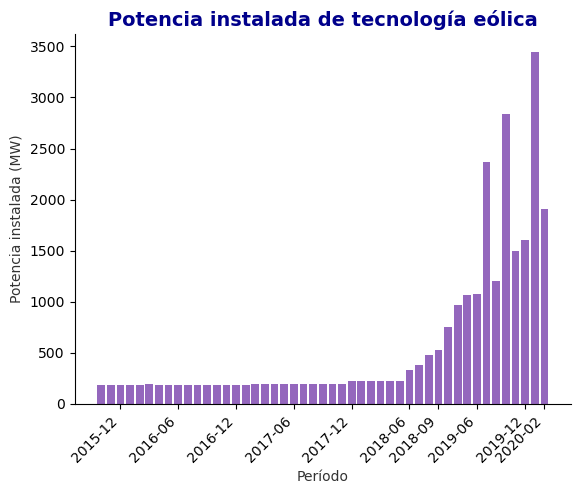

In [224]:
plt.bar(x1, y1, color='C4')

plt.xlabel('Período', color='0.2')
plt.ylabel('Potencia instalada (MW)', color='0.2')


plt.title("Potencia instalada de tecnología eólica", 
          fontdict={
              'size': 14,
              'color': 'DarkBlue',
              'weight': 'bold'
})

plt.gca().spines['top'].set_visible(False) 
plt.gca().spines['right'].set_visible(False)

tick_list = [
     '2015-12', '2016-06', '2016-12',
    '2017-06', '2017-12',
    '2018-06', '2018-09', #incluyo un tick label en sept-2018 porque no hay datos para dic-2018
    '2019-06', '2019-12',
    '2020-02'
] #periodo_formateado arranca en 2015-10 y termina en 2020-02. Existen datos faltantes para el período 2018-10 a 2018-12 y 2019-04
plt.xticks(tick_list, rotation=45, horizontalalignment="right")


plt.show()

**(5)** Para seguir ejercitando `matplotlib`, construyan una figura con 4 gráficos de la potencia instalada por energía a lo largo el periodo, en una disposición de 2x2. Que por lo menos un gráfico sea de línea y por lo menos un gráfico sea de barra. Los otros dos gráficos pueden ser uno de línea y otro de barra o lo que ustedes quieran probar. Lo importante es practicar graficar y que el gráfico sea razonable. Si quieren que alguno de los gráficos muestre algo distinto de la evolución temporal de la potencia instalada, no hay problema.

In [226]:
print(df['fuente_generacion'].unique()) #me sirve para chequear que me creó bien los grupos

#Primero me creo una nueva base agrupada por fuente de generación, i. e. energía.
df_energia = df.groupby(by=["periodo_formateado", "fuente_generacion"]).agg({'potencia_instalada_mw': "sum"}).rename({"potencia_instalada_mw": "potencia_por_energia"}, axis=1)
df_energia.reset_index(inplace=True)
df_energia.sort_values(by='periodo_formateado', ascending=True, inplace=True)
df_energia.head(20)

['Térmica' 'Hidráulica' 'Renovable' 'Nuclear']


,periodo_formateado,fuente_generacion,potencia_por_energia
0,2015-10,Hidráulica,11107.290
1,2015-10,Nuclear,1730.300
2,2015-10,Renovable,212.800
3,2015-10,Térmica,20276.297
4,2015-11,Hidráulica,11107.290
5,2015-11,Nuclear,1730.300
6,2015-11,Renovable,212.800
7,2015-11,Térmica,20289.937
11,2015-12,Térmica,20429.737
10,2015-12,Renovable,212.800


In [227]:
y1_termica = df_energia[df_energia["fuente_generacion"]=="Térmica"]["potencia_por_energia"] 
x1_termica = df_energia[df_energia["fuente_generacion"]=="Térmica"]["periodo_formateado"]

In [228]:
y1_hid = df_energia[df_energia["fuente_generacion"]=="Hidráulica"]["potencia_por_energia"] 
x1_hid = df_energia[df_energia["fuente_generacion"]=="Hidráulica"]["periodo_formateado"]

In [229]:
y1_nuc = df_energia[df_energia["fuente_generacion"]=="Nuclear"]["potencia_por_energia"] 
x1_nuc = df_energia[df_energia["fuente_generacion"]=="Nuclear"]["periodo_formateado"]

In [230]:
y1_ren = df_energia[df_energia["fuente_generacion"]=="Renovable"]["potencia_por_energia"] 
x1_ren = df_energia[df_energia["fuente_generacion"]=="Renovable"]["periodo_formateado"]

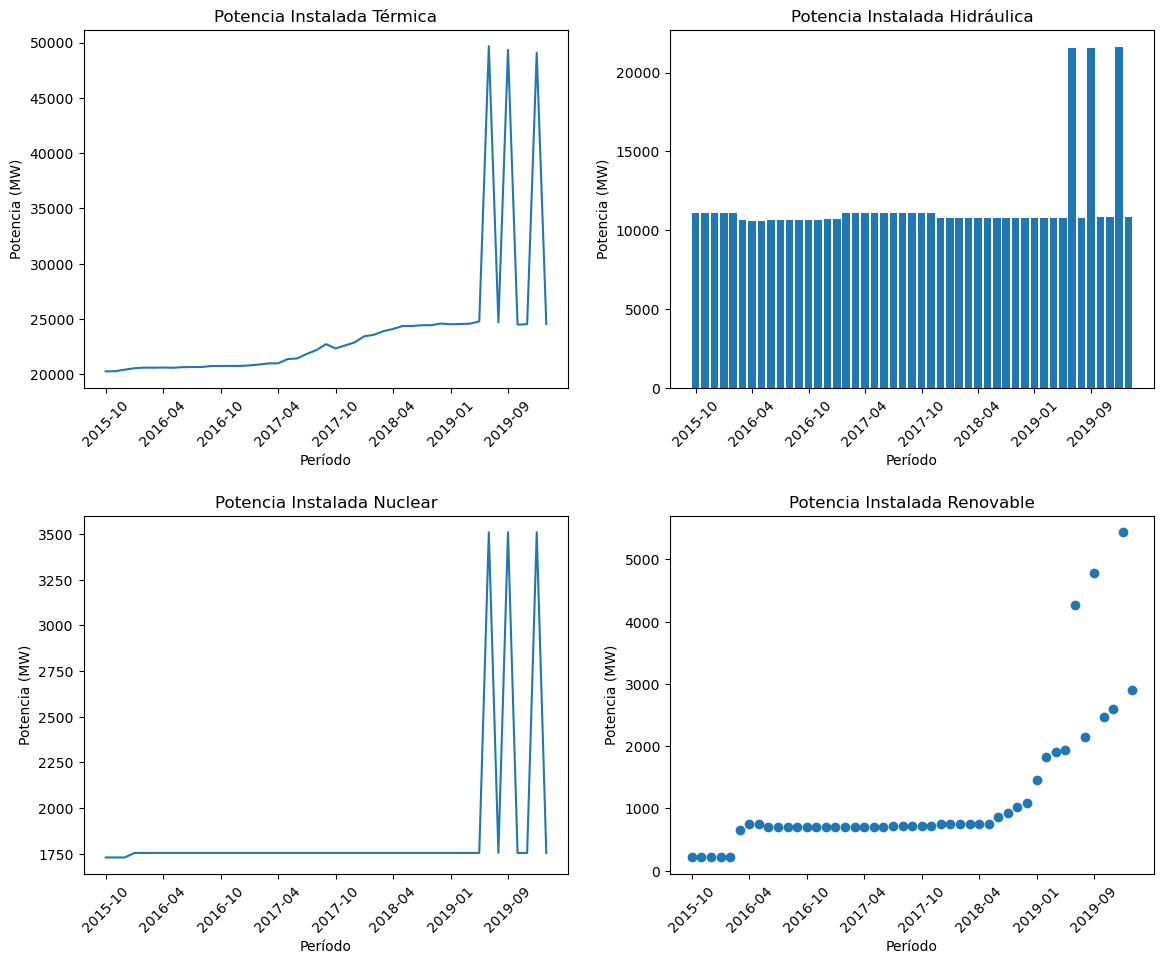

In [239]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico 1: Gráfico de lineas de térmica
axs[0, 0].plot(x1_termica, y1_termica, color='C0')
axs[0, 0].set_title('Potencia Instalada Térmica')
axs[0, 0].set_xlabel('Período')
axs[0, 0].set_ylabel('Potencia (MW)')
axs[0, 0].tick_params(axis='x', rotation=45)  
xticks = x1_termica[::6]
axs[0, 0].set_xticks(xticks)

# Gráfico 2: Gráfico de barras de hidráulica
axs[0, 1].bar(x1_hid, y1_hid, color='C0')
axs[0, 1].set_title('Potencia Instalada Hidráulica')
axs[0, 1].set_xlabel('Período')
axs[0, 1].set_ylabel('Potencia (MW)')
axs[0, 1].tick_params(axis='x', rotation=45)  
xticks = x1_hid[::6]
axs[0, 1].set_xticks(xticks)

# Gráfico 3: Gráfico de lineas de nuclear
axs[1, 0].plot(x1_nuc, y1_nuc, color='C0')
axs[1, 0].set_title('Potencia Instalada Nuclear')
axs[1, 0].set_xlabel('Período')
axs[1, 0].set_ylabel('Potencia (MW)')
axs[1, 0].tick_params(axis='x', rotation=45)  
xticks = x1_nuc[::6]
axs[1, 0].set_xticks(xticks)

# Gráfico 4: Gráfico de puntos de renovable
axs[1, 1].scatter(x1_ren, y1_ren, color='C0')
axs[1, 1].set_title('Potencia Instalada Renovable')
axs[1, 1].set_xlabel('Período')
axs[1, 1].set_ylabel('Potencia (MW)')
axs[1, 1].tick_params(axis='x', rotation=45)  
xticks = x1_ren[::6]
axs[1, 1].set_xticks(xticks)

plt.tight_layout(pad=2.0) #pad me genera un espacio entre gráficos para evitar que se superpongan

plt.show()

**(6)** Armen una figura con un gráfico que combine dos representaciones de datos de su elección. Podría ser combinar un gráfico de barras con uno de líneas, donde el eje vertical izquierdo muestre los valores de uno y el eje vertical derecho muestre los valores del otro. Por ejemplo que en el gráfico las barras muestren la variación de potencia instalada respecto al periodo pasado y una línea muestre la evolución de potencia instalada. _Nota: van a tener que trabajar sobre el dataframe para esto, la función `.shift()` aplicada a la columna de potencia instalada les puede ser útil como paso intermedio para calcular el crecimiento porcentual_.

In [240]:
#Me genero un subset con las observaciones de fuente de energía hidráulica
hid = "Hidráulica"
df_hid = df_energia.query("fuente_generacion==@hid")

df_hid['var_pot'] = df_hid['potencia_por_energia'] - df_hid['potencia_por_energia'].shift(1)
df_hid['var_pot_porc'] = ((df_hid['var_pot'] / df_hid['potencia_por_energia'].shift(1))*100).copy()
df_hid.tail()

C:\Users\Sofia\AppData\Local\Temp\ipykernel_924\2649229539.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hid['var_pot'] = df_hid['potencia_por_energia'] - df_hid['potencia_por_energia'].shift(1)
C:\Users\Sofia\AppData\Local\Temp\ipykernel_924\2649229539.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hid['var_pot_porc'] = ((df_hid['var_pot'] / df_hid['potencia_por_energia'].shift(1))*100).copy()


,periodo_formateado,fuente_generacion,potencia_por_energia,var_pot,var_pot_porc
168,2019-09,Hidráulica,21580.76,10790.38,100.000000
172,2019-11,Hidráulica,10812.38,-10768.38,-49.898057
176,2019-12,Hidráulica,10812.38,0.00,0.000000
180,2020-01,Hidráulica,21624.76,10812.38,100.000000
184,2020-02,Hidráulica,10812.38,-10812.38,-50.000000


In [241]:
y1_hid_var = df_hid["var_pot_porc"]
x1_hid_var = df_hid["periodo_formateado"]
#y1_hid_var
#x1_hid_var

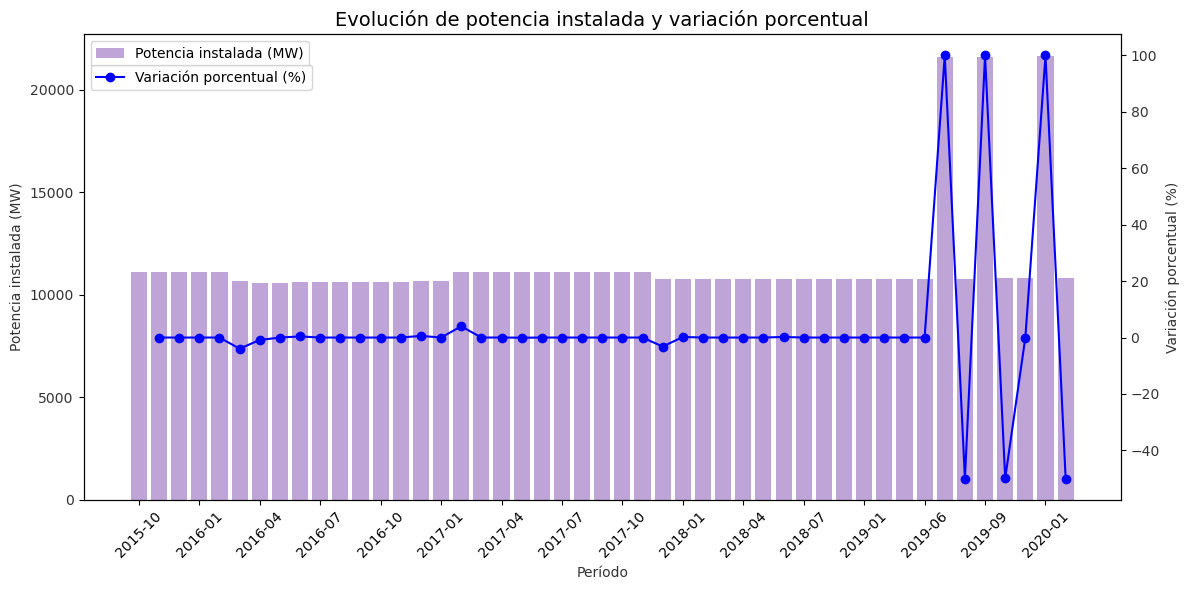

In [245]:
#creo figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

#Gráfico de barras con evolución
ax1.bar(x1_hid, y1_hid, color='C4', alpha=0.6, label='Potencia instalada (MW)')
ax1.set_xlabel('Período', color='0.2')
ax1.set_ylabel('Potencia instalada (MW)', color='0.2')
ax1.tick_params(axis='y', labelcolor='0.2')

#Creo un segundo eje para el gráfico de líneas con la evolución
ax2 = ax1.twinx()  
#Gráfico de líneas con variación porcentual
ax2.plot(x1_hid_var, y1_hid_var, color='Blue', marker='o', label='Variación porcentual (%)')
ax2.set_ylabel('Variación porcentual (%)', color='0.2')
ax2.tick_params(axis='y', labelcolor='0.2')

xticks = x1_hid[::3]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks, rotation=45)

plt.title('Evolución de potencia instalada y variación porcentual', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.95))  #bbox_to_anchor() me permite separar las leyendas

plt.tight_layout()
plt.show()

**(7)** En este ejercicio les pedimos que busquen en la documentación de `matplotlib` las diferentes opciones de gráficos disponibles. Armen un gráfico distinto a lo que hayan aplicado en los ejercicios anteriores.

In [247]:
#Mi idea es hacer un gráfico de torta que muestre la cantidad de agentes/parques de generación de energía por región del país
#Entonces primero cuento la cantidad de filas con el mismo valor para cada valor único de región
region_count = df['region'].value_counts()
region_count

region
NOROESTE         2740
BUENOS AIRES     2283
CENTRO           1880
CUYO             1809
COMAHUE          1642
GRAN BS.AS.      1532
NORESTE          1374
LITORAL           971
PATAGONICA        958
GENERAC MOVIL     580
(en blanco)        24
Name: count, dtype: int64

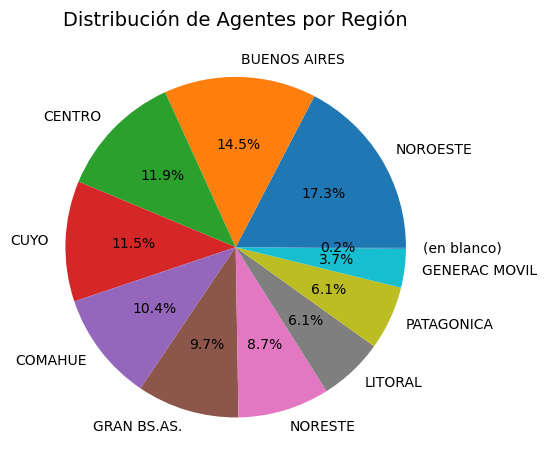

In [252]:
plt.pie(region_count.values, labels=region_counts.index, autopct='%1.1f%%')

plt.get_cmap('tab10')
plt.title('Distribución de Agentes por Región', fontsize=14)
plt.tight_layout()
plt.show()